In [1]:
# Importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Set path for train and test data
train_data_dir = '/content/drive/My Drive//Deep Learning/forest_fire/Training and Validation'
validation_data_dir = '/content/drive/My Drive/Deep Learning/forest_fire/Testing'


# Image dimensions
img_width, img_height = 224,224

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Apply random shear transformations
    zoom_range=0.2,   # Apply random zoom
    horizontal_flip=True  # Flip images horizontally
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training data and augment it
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary'  # Use 'binary' for 2-class classification (fire and non fire)
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary'
)


Found 1520 images belonging to 2 classes.
Found 380 images belonging to 2 classes.


In [5]:
# Create a CNN model
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fourth convolutional layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

# Dropout layer for regularization
model.add(Dropout(0.5))

# Output layer with one neuron (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,435,841 (74.14 MB)

 Trainable params: 19,435,841 (74.14 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

# Evaluate the model
score = model.evaluate(validation_generator, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 862s 9s/step - accuracy: 0.7471 - loss: 0.4927 - val_accuracy: 0.9421 - val_loss: 0.1838
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 291s 3s/step - accuracy: 0.9418 - loss: 0.1670 - val_accuracy: 0.9342 - val_loss: 0.1863
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.9530 - loss: 0.1439 - val_accuracy: 0.9132 - val_loss: 0.2118
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 287s 3s/step - accuracy: 0.9639 - loss: 0.1191 - val_accuracy: 0.9237 - val_loss: 0.2015
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 311s 3s/step - accuracy: 0.9633 - loss: 0.1201 - val_accuracy: 0.9132 - val_loss: 0.2412
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 290s 3s/step - accuracy: 0.9697 - loss: 0.1116 - val_accuracy: 0.9158 - val_loss: 0.2754
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.9693 - loss: 0.1026 - val_accuracy: 0.9421 - val_loss: 0.1766
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 329s 3s/step - accuracy: 0.9695 - loss: 0.0983 - val_accuracy: 0.9368 - val_loss: 0.

In [10]:
print(history.history)

{'accuracy': [0.8493421077728271, 0.941447377204895, 0.9585526585578918, 0.9624999761581421, 0.9618421196937561, 0.9585526585578918, 0.9710526466369629, 0.9638158082962036, 0.9664473533630371, 0.9730263352394104], 'loss': [0.3439212143421173, 0.16971726715564728, 0.1302759200334549, 0.12197849899530411, 0.13292406499385834, 0.127763032913208, 0.10152626782655716, 0.10396711528301239, 0.09445799887180328, 0.08374407142400742], 'val_accuracy': [0.942105233669281, 0.9342105388641357, 0.9131578803062439, 0.9236842393875122, 0.9131578803062439, 0.9157894849777222, 0.942105233669281, 0.9368420839309692, 0.9447368383407593, 0.9368420839309692], 'val_loss': [0.18377816677093506, 0.18628506362438202, 0.21175311505794525, 0.2015407383441925, 0.24123889207839966, 0.27544087171554565, 0.17659951746463776, 0.19087417423725128, 0.16912125051021576, 0.2098109871149063]}


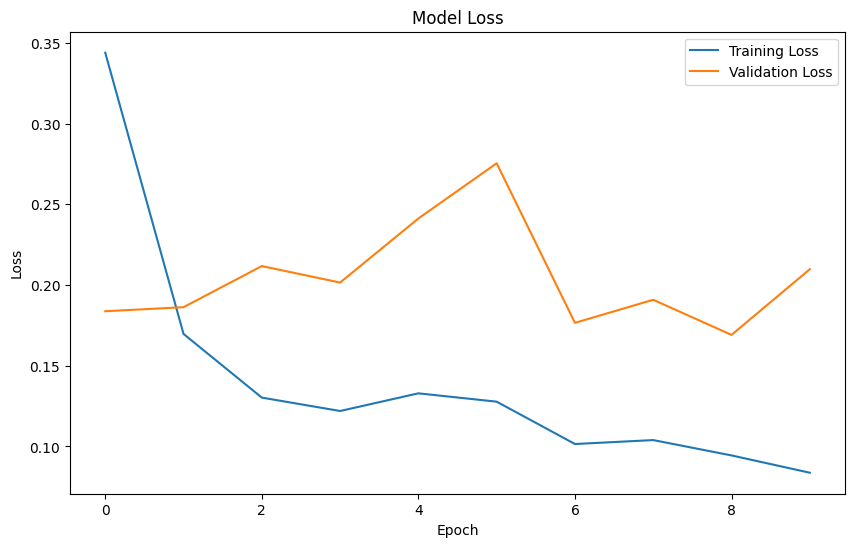

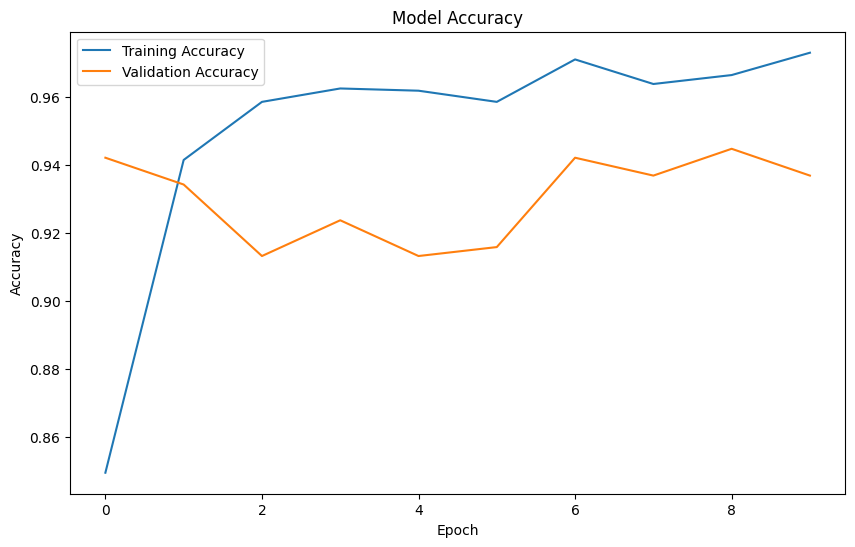

In [11]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [14]:
# prompt: create a code for testing a saved model using an image
# Path to the test image
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

image_path = '/content/drive/My Drive/Deep Learning/forest_fire/test3.jpg'
def test_and_visualize(model, image_path, threshold=0.5):

    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    # Predict the class
    prediction = model.predict(img_array)
    predicted_prob = prediction[0][0]

    threshold = 0.5


    # Determine classification and confidence
    if predicted_prob > threshold:
        label = "Non-Fire"
        confidence = predicted_prob
    else:
        label = "Fire"
        confidence = 1 - predicted_prob

    # Print classification and confidence
    print(f"The image is classified as '{label}' with confidence {confidence:.2f}")


   # Display the image with prediction
    plt.figure(figsize=(6, 6))
    plt.imshow(np.array(img).astype('uint8'))  # Convert the PIL image to a NumPy array for display
    plt.axis('off')
    plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
The image is classified as 'Fire' with confidence 0.58


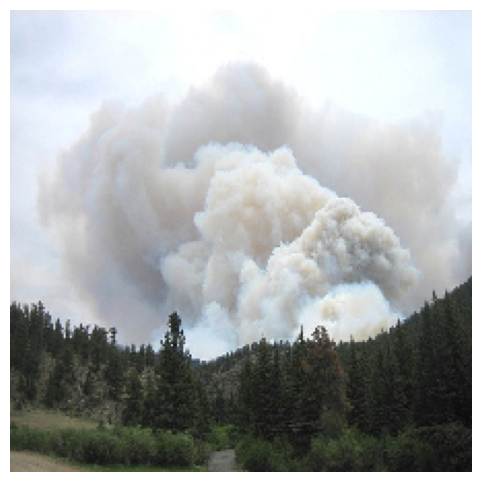

In [15]:
test_and_visualize(model, image_path)

In [17]:
from tensorflow.keras.models import load_model, save_model
model = save_model(model,'/content/drive/My Drive/Deep Learning/wildfire_model02.keras')

In [18]:
model = load_model('/content/drive/My Drive/Deep Learning/wildfire_model02.keras')

In [20]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [22]:
import gradio as gr
import tensorflow as tf
import numpy as np
import cv2

# Load your pre-trained model
model = tf.keras.models.load_model('/content/drive/My Drive/Deep Learning/wildfire_model02.keras')

# Define image dimensions
img_width, img_height = 224, 224

# Define the prediction function
def predict_wildfire(image):
    # Preprocess the input image
    img_resized = cv2.resize(image, (img_width, img_height))  # Resize to model input size
    img_array = np.expand_dims(img_resized, axis=0) / 255.0  # Normalize and add batch dimension

    # Get model prediction
    predictions = model.predict(img_array)  # Predict on input image
    predicted_class = 0 if predictions[0][0] < 0.5 else 1
    confidence = predictions[0][0] if predicted_class == 1 else 1 - predictions[0][0]
    severity = "Fire" if predicted_class == 0 else "No Fire"

    # Return the prediction
    return f"{severity} (Confidence: {confidence:.2f})"

# Gradio Interface
interface = gr.Interface(
    fn=predict_wildfire,
    inputs=gr.Image(type="numpy"),  # Input: Image
    outputs=gr.Textbox(label="Prediction"),  # Output: Prediction text
    title="Wildfire Severity Prediction",
    description="Upload an image, and the model will classify the severity of the wildfire as either 'Severe Fire' or 'No Fire'.",
)

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://233c29ccf77aab2ce3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
